# Prosper Loan Data Exploration
## by: Abed Ibrahim Sultan

## Investigation Overview

> I investigated some of the relationships between different variables to show how they are related. I considered the borrower rate to be the most interesting feature of investigation.

## Dataset Overview

> This document explores a dataset containing 113,937 loans with 81 variables on each loan. This data dictionary explains the variables in the data set. Only 12 attributes were selected to do the analysis on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
original_df = pd.read_csv('prosperLoanData.csv')

# Extract the required attributes to be analyzed into a new dataframe
df = original_df[['Term','LoanStatus','BorrowerRate','IncomeRange','IncomeVerifiable','StatedMonthlyIncome',
         'TotalProsperLoans','LoanCurrentDaysDelinquent','LoanOriginalAmount','LoanOriginationQuarter',
         'MonthlyLoanPayment','Investors']]

# Convert null values to 0 
df = df.fillna(0)

# convert IncomeRange, LoanOriginationQuarter, and LoanStatus into ordered categorical types
ordinal_vars={'IncomeRange':['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
             'LoanOriginationQuarter':['Q4 2005','Q1 2006','Q2 2006','Q3 2006','Q4 2006','Q1 2007','Q2 2007','Q3 2007','Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008','Q2 2009','Q3 2009','Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010','Q1 2011','Q2 2011','Q3 2011','Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012','Q1 2013','Q2 2013','Q3 2013','Q4 2013','Q1 2014'],
             'LoanStatus':['Current','FinalPaymentInProgress','Completed','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted','Cancelled']}

for var in ordinal_vars:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_vars[var])
    df[var] = df[var].astype(ordered_var)


## Distribution of Borrower Rate

> The distribution takes on a range from 0 to 0.4. There are some outliers higher than 0.4, but, the graph is limited to 0.4.The distribution is about to be normally distributed with some jumps in the data frequencies.

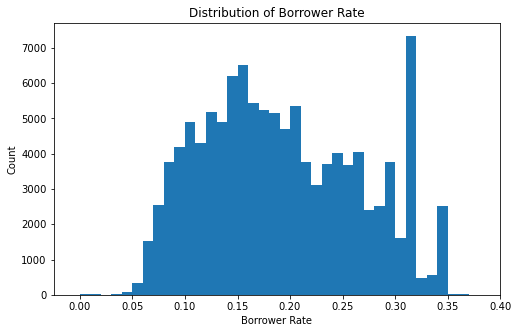

In [3]:
# plot the distribution of Borrower Rate
bin_size = 0.01
bins = np.arange(0,df['BorrowerRate'].max()+bin_size,bin_size)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='BorrowerRate', bins=bins);
plt.title('Distribution of Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.xlim(right=.4);

## Borrower Rate by Term

> A violin plot and a box plot are used to display the same relationship. The term 36 has a wider borrower rate range, but its median is nearly equal to the term 60. The term 12 has a lower median.

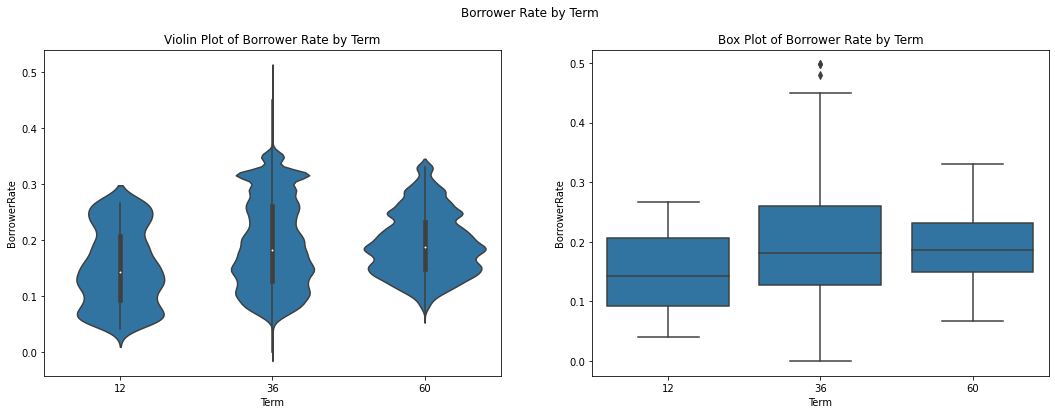

In [5]:
plt.figure(figsize=[18,6])
plt.suptitle('Borrower Rate by Term')

# violin plot on left
plt.subplot(1,2,1)
sb.violinplot(data=df, x='Term', y='BorrowerRate', color=sb.color_palette()[0]);
plt.title('Violin Plot of Borrower Rate by Term');

# box plot on right
plt.subplot(1,2,2)
sb.boxplot(data=df, x='Term', y='BorrowerRate', color=sb.color_palette()[0]);
plt.title('Box Plot of Borrower Rate by Term');

## Borrower Rate by Term and Monthly loan payment
This Visualization is using the faceting method for a scatter plot to describe the relationship between borrower rate and monthly loan payment by term.
For the term 12, the borrower rates are fewer than 0.3 with the higher monthly loan payment being about 2500.
For the term 36, the borrower rates are fewer than 0.5 with the higher monthly loan payment being fewer than 1500.
For the term 60, the borrower rates are fewer than 0.35 with the higher monthly loan payment being about 1000

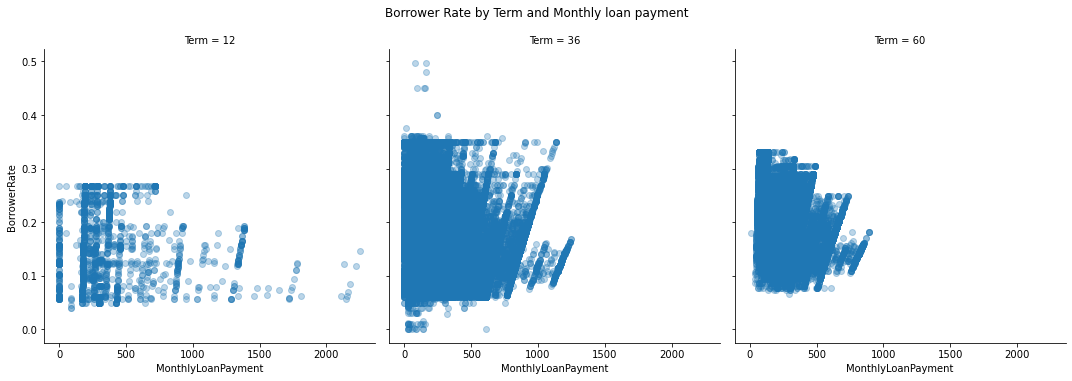

In [7]:
# Faceting scatter plot
g = sb.FacetGrid(data = df, col = 'Term', height=5);
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerRate',alpha=.3)
plt.suptitle('Borrower Rate by Term and Monthly loan payment', y=1.05);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [8]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 439066 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Mona\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Mona\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Mona\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Mona\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Mona\anaconda3\lib\site-packages\nbconvert\nbconvertap